In [2]:
#step 1: Load Data file
import pandas as pd
import os
def current_path():
    os.chdir('c:/users/meenakshi ganesh/downloads/python-learn')
    print(os.getcwd())
    print()
current_path()
print(os.getcwd())


import pandas as pd
FilePath = 'c:/users/meenakshi ganesh/downloads/python-learn/ANOVA_Data.xlsx'
df = pd.read_excel(FilePath, sheet_name='One_way_1')
df = df.loc[:,['X1', 'X2', 'X3', 'X4', 'X5']]
df

c:\users\meenakshi ganesh\downloads\python-learn

c:\users\meenakshi ganesh\downloads\python-learn


,X1,X2,X3,X4,X5
0,80.0,150.0,48.0,100.0,25
1,125.0,40.0,35.0,96.0,80
2,35.0,120.0,95.0,35.0,30
3,58.0,75.0,45.0,99.0,35
4,110.0,160.0,75.0,75.0,30
5,140.0,60.0,115.0,150.0,28
6,97.0,45.0,42.0,45.0,20
7,50.0,100.0,78.0,100.0,75
8,65.0,86.0,65.0,120.0,48
9,79.0,87.0,125.0,50.0,20


In [25]:
df= df.dropna()
df

,X1,X2,X3,X4,X5
0,80.0,150.0,48.0,100.0,25
1,125.0,40.0,35.0,96.0,80
2,35.0,120.0,95.0,35.0,30
3,58.0,75.0,45.0,99.0,35
4,110.0,160.0,75.0,75.0,30
5,140.0,60.0,115.0,150.0,28
6,97.0,45.0,42.0,45.0,20
7,50.0,100.0,78.0,100.0,75
8,65.0,86.0,65.0,120.0,48
9,79.0,87.0,125.0,50.0,20


In [26]:
df.shape

(10, 5)

In [23]:
df['X1']

0      80.0
1     125.0
2      35.0
3      58.0
4     110.0
5     140.0
6      97.0
7      50.0
8      65.0
9      79.0
10     35.0
11     85.0
12    120.0
13      NaN
14      NaN
15      NaN
Name: X1, dtype: float64

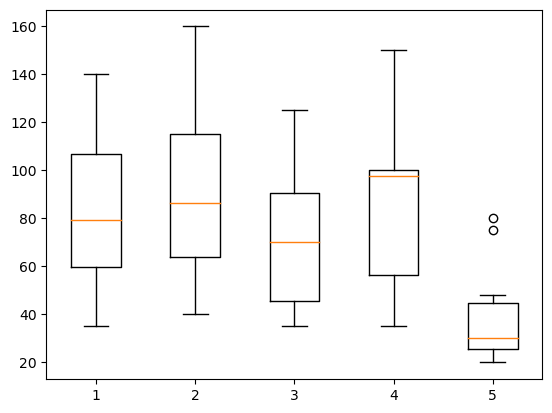

In [28]:
#Exploting Data

# Import libraries
import matplotlib.pyplot as plt
#matplotlib is command to make a box plot

# Creating a plot
plt.boxplot(df.loc[:,['X1', 'X2', 'X3', 'X4', 'X5']])

# show plot
plt.show()

In [29]:
# reshape the dataframe suitable for statsmodels package 
df_melt = pd.melt(df, value_vars=['X1', 'X2', 'X3', 'X4', 'X5'])
# replace column names
df_melt.columns = ['Startup','Cost']
df_melt

,Startup,Cost
0,X1,80.0
1,X1,125.0
2,X1,35.0
3,X1,58.0
4,X1,110.0
5,X1,140.0
6,X1,97.0
7,X1,50.0
8,X1,65.0
9,X1,79.0


In [30]:
# get ANOVA table as R like output
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Ordinary Least Squares (OLS) model
model = ols('Cost ~ C(Startup)', data=df_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table
# output (ANOVA F and p value)

,sum_sq,df,F,PR(>F)
C(Startup),18185.68,4.0,4.079539,0.00662
Residual,50150.00,45.0,NaN,NaN


In [31]:
#post hoc test
import statsmodels.stats.multicomp as mc
comp = mc.MultiComparison(df_melt['Cost'], df_melt['Startup'])
post_hoc_res = comp.tukeyhsd()
post_hoc_res.summary()

#false means you have acepted 
# true means 

group1,group2,meandiff,p-adj,lower,upper,reject
X1,X2,8.4,0.9798,-34.0213,50.8213,False
X1,X3,-11.6,0.9359,-54.0213,30.8213,False
X1,X4,3.1,0.9996,-39.3213,45.5213,False
X1,X5,-44.8,0.0338,-87.2213,-2.3787,True
X2,X3,-20.0,0.6684,-62.4213,22.4213,False
X2,X4,-5.3,0.9965,-47.7213,37.1213,False
X2,X5,-53.2,0.0075,-95.6213,-10.7787,True
X3,X4,14.7,0.8608,-27.7213,57.1213,False
X3,X5,-33.2,0.1897,-75.6213,9.2213,False
X4,X5,-47.9,0.0198,-90.3213,-5.4787,True
